In [1]:
import numpy as np
import pandas as pd
import seaborn as sns #library untuk membuat grafik dan statistik
import matplotlib.pyplot as plt #ntuk melakukan visualisasi data
plt.style.use('ggplot')
from matplotlib.pyplot import figure #Untuk merubah ukuran gambar
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
# pd.set_option("display.max_row", None)
pd.set_option("display.max_columns", None)
# Kami ingin menampilkan semua float dengan hanya memiliki satu angka desimal dibelakang koma.
pd.options.display.float_format = "{:.1f}".format
from statistics import mean
df = pd.read_excel("Movies_jadi.xlsx")
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,The Batman,PG-13,Action,2022,"March 2, 2022 (United States)",7.9,547540.0,Matt Reeves,Matt Reeves,Robert Pattinson,United States,200000000.0,770836163.0,Warner Bros,176.0
7694,The Bad Guys,PG,Animation,2022,"March 25, 2022 (United States)",6.9,27486.0,Pierre Perifel,Aaron Blabey,Sam Rockwell,United States,70000000.0,245613085.0,DreamWorks Animation,100.0
7695,The Man from Toronto,PG-13,Action,2022,"June 24, 2022 (United States)",5.8,29769.0,Patrick Hughes,Robbie Fox,Kevin Hart,United States,75000000.0,171000000.0,Netflix,110.0
7696,Fantastic Beasts: The Secrets of Dumbledore,PG-13,Action,2022,"April 13, 2022 (United States)",6.2,114128.0,David Yates,J.K. Rowling,Eddie Redmayne,United States,200000000.0,405161334.0,Warner Bros,142.0


In [2]:
df = df.rename(columns ={"name":"Name", "rating":"Rating", "genre":"Genre", "year":"Year", "released":"Released", "score":"Score", "votes":"Votes", "director":"Director", "writer":"Writer", "star":"Star", "country":"Country", "budget":"Budget", "gross":"Gross", "company":"Company", "runtime":"Runtime"})

In [3]:
print('Dataset ini berisikan data dari film tahun',df.Year.min(),'hingga',df.Year.max())

Dataset ini berisikan data dari film tahun 1980 hingga 2022


In [4]:
# Memisah satu kolom Released menjadi 2 kolom yang berbeda yakni ReleasedCountry dan ReleasedDate dikarenakan pada kolom released terdapat nilai datetime dan string sehingga akan lebih baik jika dipisah keduanya.

Released_Date_Country = df['Released'].str.split(pat='(', expand=True)
Released_Date_Country = Released_Date_Country.rename(columns ={0:"ReleasedDate", 1:"ReleasedCountry"})
Released_Date_Country['ReleasedCountry'] = Released_Date_Country['ReleasedCountry'].astype(str).str.replace(')','')
Released_Date_Country

C:\Users\rendi\AppData\Local\Temp\ipykernel_20244\2330560415.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Released_Date_Country['ReleasedCountry'] = Released_Date_Country['ReleasedCountry'].astype(str).str.replace(')','')


,ReleasedDate,ReleasedCountry
0,"June 13, 1980",United States
1,"July 2, 1980",United States
2,"June 20, 1980",United States
3,"July 2, 1980",United States
4,"July 25, 1980",United States
...,...,...
7693,"March 2, 2022",United States
7694,"March 25, 2022",United States
7695,"June 24, 2022",United States
7696,"April 13, 2022",United States


In [5]:
#Menyatukan kembali kolom ReleasedDate ReleasedCountry yang telah didapat kedalam dataframe utama, lalu menghapus kolom lama yaitu kolom Released.

df = pd.concat([df, Released_Date_Country], axis = 1)
del df["Released"]
df

,Name,Rating,Genre,Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,ReleasedDate,ReleasedCountry
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,The Batman,PG-13,Action,2022,7.9,547540.0,Matt Reeves,Matt Reeves,Robert Pattinson,United States,200000000.0,770836163.0,Warner Bros,176.0,"March 2, 2022",United States
7694,The Bad Guys,PG,Animation,2022,6.9,27486.0,Pierre Perifel,Aaron Blabey,Sam Rockwell,United States,70000000.0,245613085.0,DreamWorks Animation,100.0,"March 25, 2022",United States
7695,The Man from Toronto,PG-13,Action,2022,5.8,29769.0,Patrick Hughes,Robbie Fox,Kevin Hart,United States,75000000.0,171000000.0,Netflix,110.0,"June 24, 2022",United States
7696,Fantastic Beasts: The Secrets of Dumbledore,PG-13,Action,2022,6.2,114128.0,David Yates,J.K. Rowling,Eddie Redmayne,United States,200000000.0,405161334.0,Warner Bros,142.0,"April 13, 2022",United States


# Mengganti Genre Fantasy ke Horror

In [6]:
# kami menyadari sesuatu yang cukup penting pada bagian genre dari dataset tersebut. Terdapat genre yakni Fantasy, dan kami telusuri lebih lanjut ternyata seluruh film tersebut adalah film yang bergenre horror jadi kami memutuskan untuk menggantinya ke dalam kategori Horror alih-alih tetap menggunakan genre Fantasy

# df[df["Genre"] == "Fantasy"]

df["Genre"] = df['Genre'].replace({"Fantasy": "Horror"})

Horror = df[(df['Genre'] == "Horror")]
Horror

,Name,Rating,Genre,Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,ReleasedDate,ReleasedCountry
5,Friday the 13th,R,Horror,1980,6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0,"May 9, 1980",United States
18,The Fog,R,Horror,1980,6.8,66000.0,John Carpenter,John Carpenter,Adrienne Barbeau,United States,1000000.0,21448782.0,AVCO Embassy Pictures,89.0,"February 8, 1980",United States
23,Xanadu,PG,Horror,1980,5.3,12000.0,Robert Greenwald,Richard Christian Danus,Olivia Newton-John,United States,20000000.0,22762571.0,Universal Pictures,96.0,"August 8, 1980",United States
25,Altered States,R,Horror,1980,6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0,"December 25, 1980",United States
31,Prom Night,R,Horror,1980,5.4,16000.0,Paul Lynch,William Gray,Leslie Nielsen,Canada,NaN,14796236.0,Guardian Trust Company,92.0,"July 18, 1980",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7610,Body at Brighton Rock,R,Horror,2019,4.8,1900.0,Roxanne Benjamin,Roxanne Benjamin,Karina Fontes,United States,NaN,5123.0,Protostar Pictures,87.0,"April 26, 2019",United States
7615,Clinton Road,NaN,Horror,2019,5.9,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0,"June 14, 2019",United States
7659,I Am Fear,Not Rated,Horror,2020,3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,13266.0,Roxwell Films,87.0,"March 3, 2020",United States
7667,Tee em el,NaN,Horror,2020,5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0,"August 19, 2020",United States


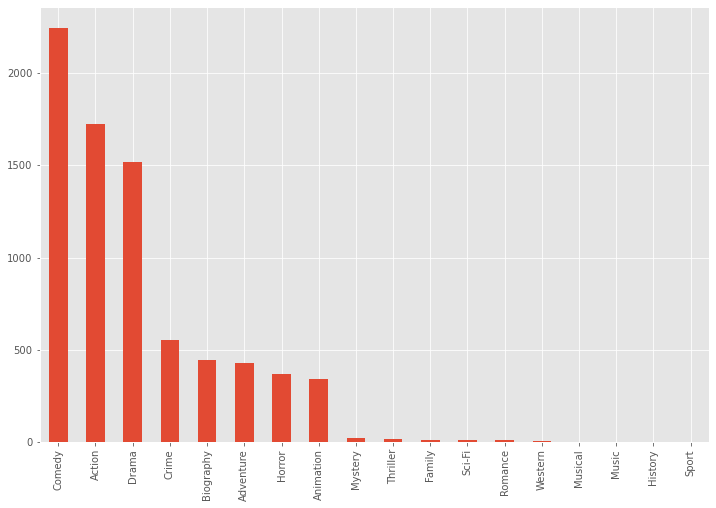

In [7]:
df['Genre'].value_counts().plot(kind='bar');

In [8]:
# Menambahkan kolom baru yakni Revenue. Jika gross adalah pendapatan kotor, dan revenue sendiri adalah pendapatan bersih setelah pendapatan kotor atau kolom Gross dikurangi biaya pembuatan film atau kolom Budget

df['Revenue']=df.apply(lambda x: x['Gross'] - x['Budget'], axis=1)

In [9]:
# disini cleaning data dengan menggunakan dropna subset yakni kolom Budget Gross dan Votes.

df = df.dropna(axis=0, subset=['Budget','Gross','Votes'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5466 entries, 0 to 7697
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5466 non-null   object 
 1   Rating           5454 non-null   object 
 2   Genre            5466 non-null   object 
 3   Year             5466 non-null   int64  
 4   Score            5466 non-null   float64
 5   Votes            5466 non-null   float64
 6   Director         5466 non-null   object 
 7   Writer           5466 non-null   object 
 8   Star             5466 non-null   object 
 9   Country          5465 non-null   object 
 10  Budget           5466 non-null   float64
 11  Gross            5466 non-null   float64
 12  Company          5464 non-null   object 
 13  Runtime          5465 non-null   float64
 14  ReleasedDate     5466 non-null   object 
 15  ReleasedCountry  5466 non-null   object 
 16  Revenue          5466 non-null   float64
dtypes: float64(6),

In [10]:
#Mengecek nilai null pada masing-masing kolom dalam Dataframe

print("Nilai Null Pada Masing-Masing Kolom\n")

for kolom in df.columns:
    print(kolom,"=>",df[kolom].isna().sum())

Nilai Null Pada Masing-Masing Kolom

Name => 0
Rating => 12
Genre => 0
Year => 0
Score => 0
Votes => 0
Director => 0
Writer => 0
Star => 0
Country => 1
Budget => 0
Gross => 0
Company => 2
Runtime => 1
ReleasedDate => 0
ReleasedCountry => 0
Revenue => 0


In [11]:
# Mengubah jenis tipe data pada beberapa kolom agar sesuai dengan yang diinginkan, contohnya kolom budget diubah menjadi int yang awalnya adalah berupa float dan kolom ReleasedDate diubah menjadi tipe data datetime karena berisikan tanggal dari suatu perilisan film

from datetime import datetime
df = df.astype({"Budget" : int, "Gross" : int, "Votes" : int})
df['ReleasedDate'] = pd.to_datetime(df['ReleasedDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5466 entries, 0 to 7697
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             5466 non-null   object        
 1   Rating           5454 non-null   object        
 2   Genre            5466 non-null   object        
 3   Year             5466 non-null   int64         
 4   Score            5466 non-null   float64       
 5   Votes            5466 non-null   int32         
 6   Director         5466 non-null   object        
 7   Writer           5466 non-null   object        
 8   Star             5466 non-null   object        
 9   Country          5465 non-null   object        
 10  Budget           5466 non-null   int32         
 11  Gross            5466 non-null   int32         
 12  Company          5464 non-null   object        
 13  Runtime          5465 non-null   float64       
 14  ReleasedDate     5466 non-null   datetim

In [12]:
#Mengeluarkan atribut kolom yang bertipe object dan menunjukkan jumlah, nilai unique, nilai tertinggi, frekuensi.
df.describe(include = ['O']).T
# df.describe(include='object')

,count,unique,top,freq
Name,5466,5381,Hercules,3
Rating,5454,10,R,2604
Genre,5466,14,Comedy,1497
Director,5466,2074,Woody Allen,33
Writer,5466,3228,Woody Allen,32
Star,5466,1863,Nicolas Cage,40
Country,5465,50,United States,4354
Company,5464,1486,Universal Pictures,336
ReleasedCountry,5466,48,United States,5113


# Melihat Budget Tertinggi dan Terendah pada saat pembuatan Film

In [13]:
Highest_Budget = df[(df['Budget'] == df.Budget.max())]
Highest_Budget

,Name,Rating,Genre,Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,ReleasedDate,ReleasedCountry,Revenue
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0,2019-04-26,United States,2441501328.0


In [14]:
Lowest_Budget = df[(df['Budget'] == df.Budget.min())]
Lowest_Budget

,Name,Rating,Genre,Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,ReleasedDate,ReleasedCountry,Revenue
3318,Following,R,Crime,1998,7.5,89000,Christopher Nolan,Christopher Nolan,Jeremy Theobald,United Kingdom,6000,48482,Next Wave Films,69.0,1999-11-05,United Kingdom,42482.0


# Melihat Film Terbaru dan Tertua yang ada pada Dataset

In [15]:
Oldest_Year = df[(df['ReleasedDate'] == df.ReleasedDate.min())]
Oldest_Year

,Name,Rating,Genre,Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,ReleasedDate,ReleasedCountry,Revenue
29,American Gigolo,R,Crime,1980,6.2,22000,Paul Schrader,Paul Schrader,Richard Gere,United States,4800000,22743674,Paramount Pictures,117.0,1980-02-01,United States,17943674.0


In [16]:
Oldest_Year = df[(df['ReleasedDate'] == df.ReleasedDate.max())]
Oldest_Year

,Name,Rating,Genre,Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,ReleasedDate,ReleasedCountry,Revenue
7689,The Gray Man,PG-13,Action,2022,6.8,2506,Anthony Russo,Joe Russo,Ryan Gosling,United States,200000000,249462,Netflix,122.0,2022-07-22,United States,-199750538.0


# Melihat Film Berpendapatan bersih Terbesar dan Terkecil

In [17]:
Oldest_Year = df[(df['Revenue'] == df.Revenue.min())]
Oldest_Year

,Name,Rating,Genre,Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,ReleasedDate,ReleasedCountry,Revenue
7689,The Gray Man,PG-13,Action,2022,6.8,2506,Anthony Russo,Joe Russo,Ryan Gosling,United States,200000000,249462,Netflix,122.0,2022-07-22,United States,-199750538.0


In [18]:
Oldest_Year = df[(df['Revenue'] == df.Revenue.max())]
Oldest_Year

,Name,Rating,Genre,Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,ReleasedDate,ReleasedCountry,Revenue
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162.0,2009-12-18,United States,2610246203.0


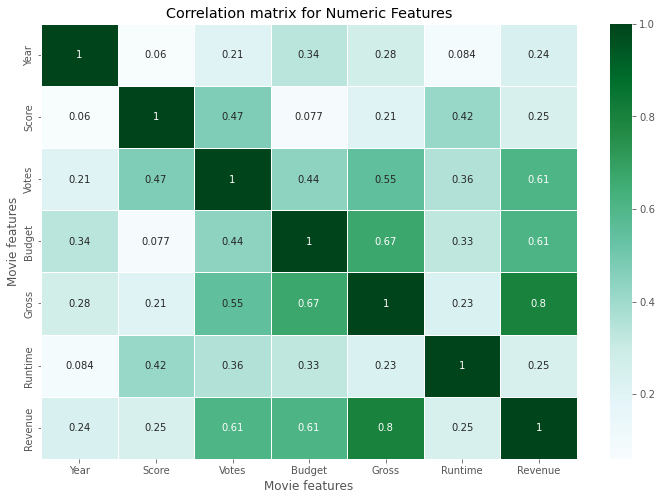

In [19]:
# Membuat HeatMap untuk melihat kolerasi antar kolom dan memberikan kami lebih banyak insight

Korelasi = df.corr()

sns.heatmap(Korelasi, linecolor='white',linewidths=1 , annot = True, cmap="BuGn")

plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [20]:
# sns.relplot(data=df, x="votes", y="gross")

Text(0, 0.5, 'Budget for Films')

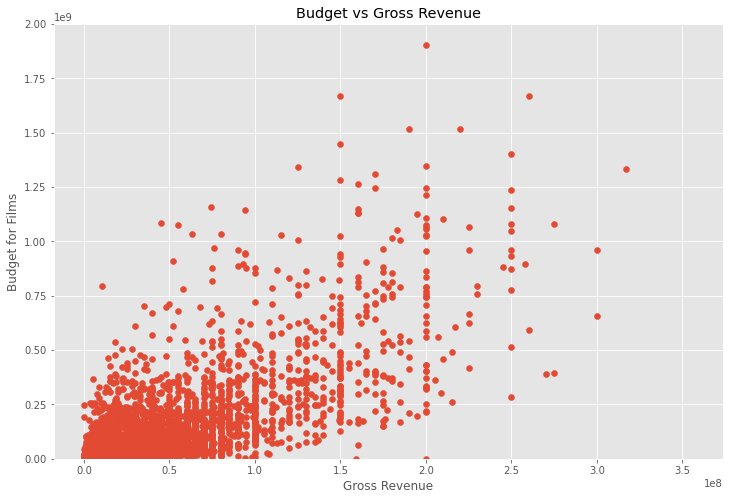

In [22]:
# scatterplot with budget vs gross
plt.scatter(x=df['Budget'], y=df['Gross'])
plt.title('Budget vs Gross Revenue')
plt.ylim([0,2*10**9])
plt.xlabel('Gross Revenue')
plt.ylabel('Budget for Films')

Text(87.0, 0.5, 'Movie Features')

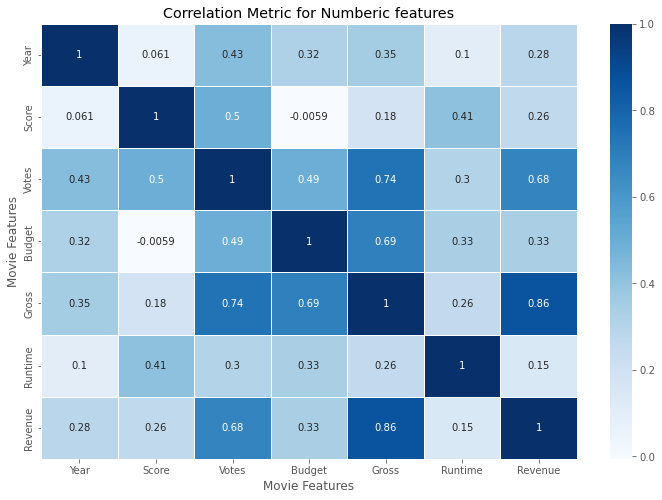

In [23]:
# Membuat HeatMap untuk melihat kolerasi antar kolom dan memberikan kami lebih banyak insight

Korelasi = df.corr(method='spearman')
sns.heatmap(Korelasi, linecolor='white',linewidths=1 , annot = True, cmap="Blues")
plt.title('Correlation Metric for Numberic features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

Text(87.0, 0.5, 'Movie Features')

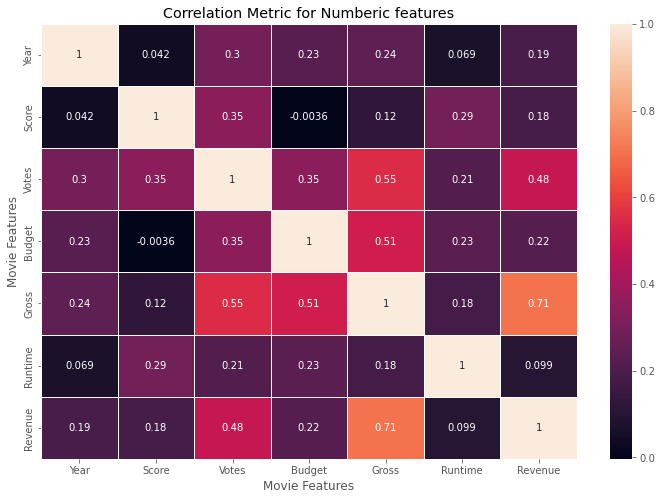

In [24]:
# Membuat HeatMap untuk melihat kolerasi antar kolom dan memberikan kami lebih banyak insight

Korelasi = df.corr(method='kendall')
sns.heatmap(Korelasi, linecolor='white',linewidths=1 , annot = True)
plt.title('Correlation Metric for Numberic features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [25]:
df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
Year,5466.0,2001.8,10.6,1980.0,1993.0,2002.0,2011.0,2022.0
Score,5466.0,6.4,1.0,1.9,5.8,6.5,7.1,9.3
Votes,5466.0,115341.1,184286.5,195.0,19000.0,52000.0,130000.0,2400000.0
Budget,5466.0,36417880.4,42310887.7,6000.0,10000000.0,22000000.0,45000000.0,356000000.0
Gross,5466.0,101976069.2,188436404.8,-2147483648.0,10689183.2,37145882.5,113358013.0,2069521700.0
Runtime,5465.0,108.3,18.2,63.0,96.0,105.0,118.0,271.0
Revenue,5466.0,68172320.9,161569808.8,-199750538.0,-3165298.8,13904183.0,71432653.2,2610246203.0


In [26]:
# membuat dataframe baru untuk biaya pembuatan film dan jumlah pendapatan kotor lalu menyortirnya
Gross_Budget = df.groupby('Company')['Budget','Gross'].sum().sort_values(by = 'Gross', ascending = False)
Gross_Budget

C:\Users\rendi\AppData\Local\Temp\ipykernel_20244\3415486179.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Gross_Budget = df.groupby('Company')['Budget','Gross'].sum().sort_values(by = 'Gross', ascending = False)


,Budget,Gross
Company,,
Warner Bros.,19568300000.0,54773202654.0
Universal Pictures,16415730001.0,53381515076.0
Columbia Pictures,15787107000.0,44455023343.0
Paramount Pictures,13893450000.0,41266143726.0
Walt Disney Pictures,10604700000.0,36265894040.0
...,...,...
.406 Production,250000.0,10580.0
Enderby Entertainment,2500000.0,8315.0
Two Prong Lesson,3000000.0,5073.0


In [27]:
# Kedua kami akan mengatur ulang indeks dan hanya mengambil 10 perusahaan teratas

Top_10_Perusahaan = Gross_Budget.reset_index()
Top_10_Perusahaan = Top_10_Perusahaan.head(10)
Top_10_Perusahaan

,Company,Budget,Gross
0,Warner Bros.,19568300000.0,54773202654.0
1,Universal Pictures,16415730001.0,53381515076.0
2,Columbia Pictures,15787107000.0,44455023343.0
3,Paramount Pictures,13893450000.0,41266143726.0
4,Walt Disney Pictures,10604700000.0,36265894040.0
5,Twentieth Century Fox,11474600000.0,30198712540.0
6,New Line Cinema,5648200000.0,19628786232.0
7,DreamWorks Animation,3414000000.0,12119225943.0
8,Marvel Studios,3314000000.0,11993189458.0
9,Dreamworks Pictures,3961700000.0,11593807697.0


In [28]:
df.sort_values(by='Revenue',ascending=False).head()

,Name,Rating,Genre,Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,ReleasedDate,ReleasedCountry,Revenue
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162.0,2009-12-18,United States,2610246203.0
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0,2019-04-26,United States,2441501328.0
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194.0,1997-12-19,United States,2001647264.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,United States,1824521700.0
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,United States,1727359754.0


In [29]:
df.sort_values(by = 'Budget', ascending=False).head()

,Name,Rating,Genre,Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,ReleasedDate,ReleasedCountry,Revenue
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0,2019-04-26,United States,2441501328.0
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,United States,1727359754.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0,2017-12-15,United States,1015698830.0
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0,2007-05-25,United States,660996492.0
7066,Justice League,PG-13,Action,2017,6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0,2017-11-17,United States,357926987.0


In [30]:
df.sort_values(by = 'Gross', ascending=False).head()

,Name,Rating,Genre,Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,ReleasedDate,ReleasedCountry,Revenue
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,United States,1824521700.0
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,United States,1727359754.0
7671,PG-13,PG-13,Action,2021,8.3,683509,Jon Watts,Stan Lee,Tom Holland,United States,200000000,1901232550,Columbia Pictures,148.0,2021-12-15,United States,1701232550.0
7480,The Lion King,PG,Animation,2019,6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019-07-19,United States,1410727580.0
6653,Jurassic World,PG-13,Action,2015,7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015-06-12,United States,1520516444.0


In [31]:
# Menampilkan 10 perusahaan yang memproduksi film terbanyak dan sekaligus jumlah filmnya

Perusahaan = df['Company'].value_counts()
Perusahaan = pd.DataFrame(Perusahaan) 
Perusahaan = Perusahaan.head(10) 
Perusahaan

,Company
Universal Pictures,336
Columbia Pictures,304
Warner Bros.,299
Paramount Pictures,280
Twentieth Century Fox,209
New Line Cinema,156
Walt Disney Pictures,108
Touchstone Pictures,105
Metro-Goldwyn-Mayer (MGM),99
Dreamworks Pictures,75


In [32]:
df['Rating'].value_counts()

R            2604
PG-13        1749
PG            913
G             111
Not Rated      44
Unrated        17
NC-17          12
TV-MA           2
Approved        1
X               1
Name: Rating, dtype: int64

In [33]:
df['Genre'].value_counts()

Comedy       1497
Action       1435
Drama         869
Crime         402
Adventure     328
Biography     312
Horror        297
Animation     282
Mystery        18
Thriller        9
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Revenue by Genre of Movies')

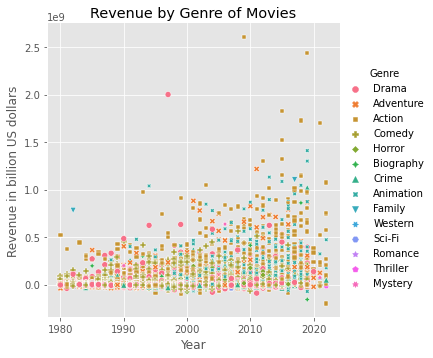

In [44]:

# plt.gcf().set_size_inches(15, 15)
sns.relplot(data=df,x='Year',y='Revenue',hue='Genre',style='Genre',sizes=(100, 100))
# plt.figure(figsize = (20,20))
plt.xlabel('Year')
plt.ylabel('Revenue in billion US dollars')
plt.title('Revenue by Genre of Movies')

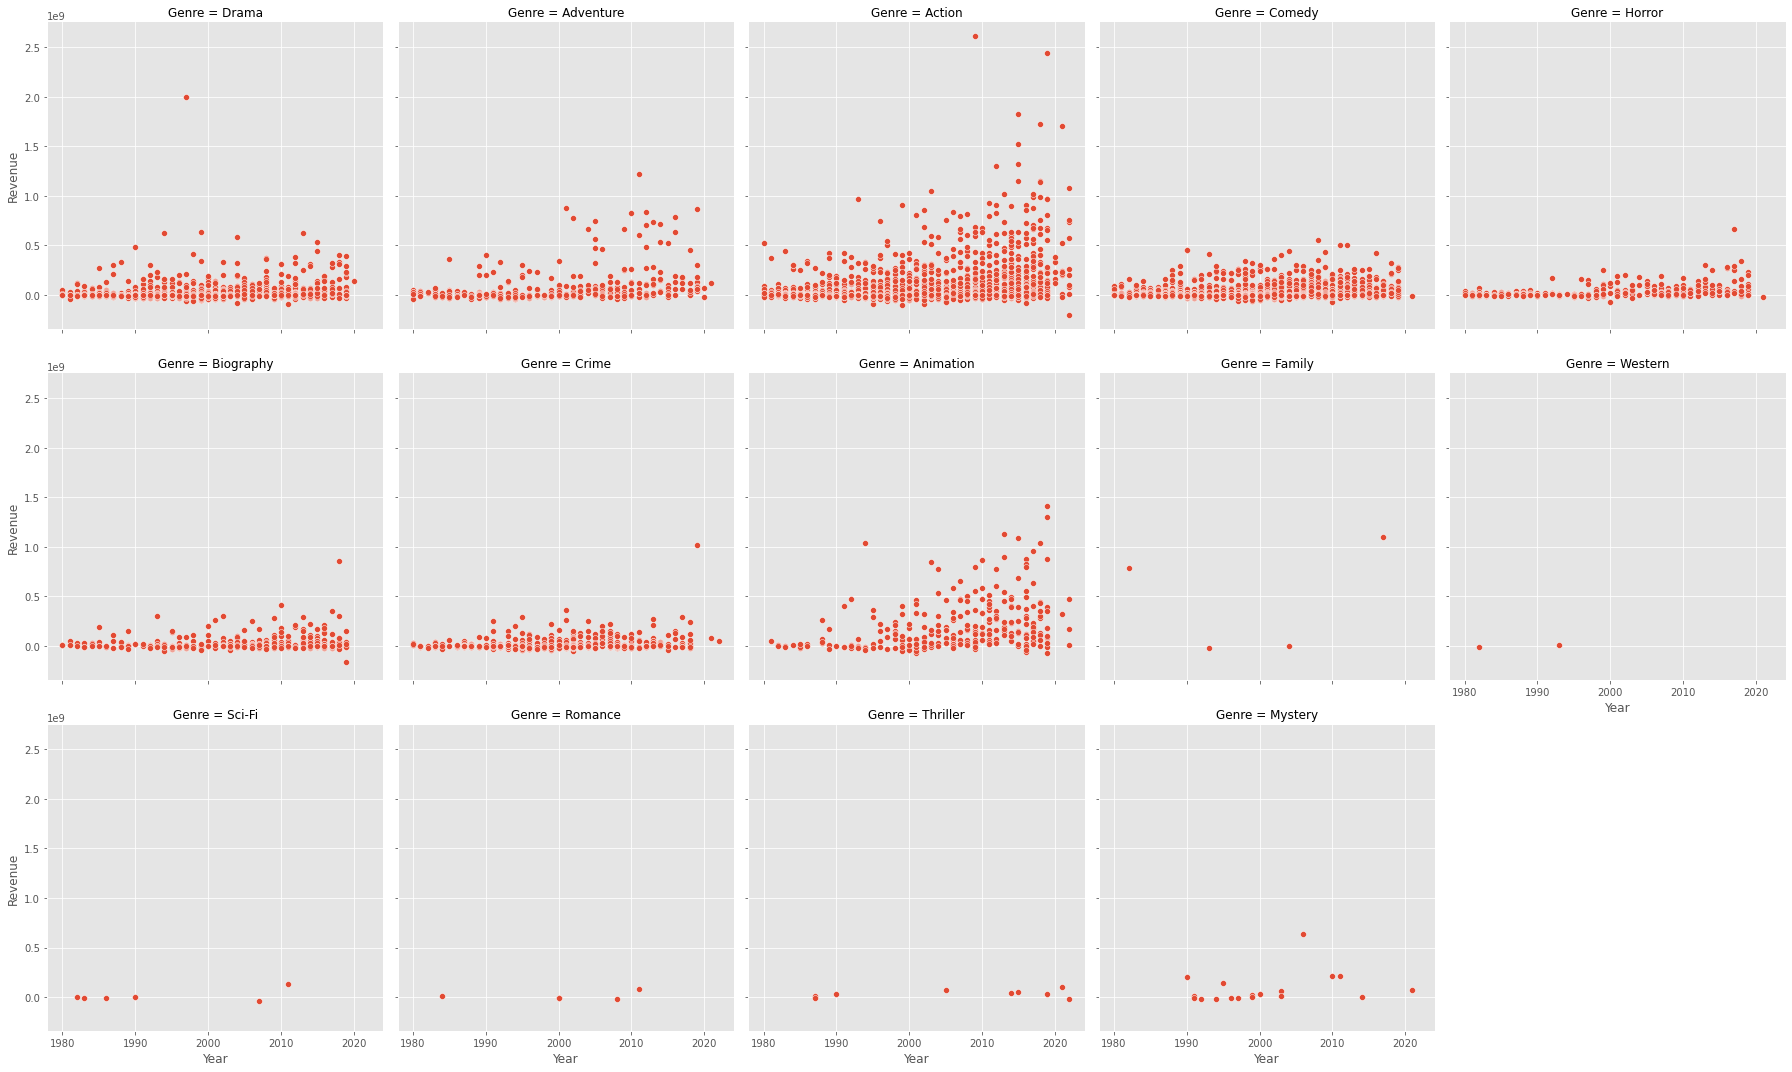

In [35]:
sns.relplot(data=df,x='Year',y='Revenue',col='Genre',col_wrap=5)

In [36]:
# sns.relplot(
#     data=df, x="Country", y="Year", col="Genre",
#     hue="Company", kind="line",
# )

In [ ]:
# jumlah film yang diproduksi dari tahun 1980 hingga 2022:

Genre = df.groupby(by='Genre', as_index=False).agg({'Name': pd.Series.nunique})
Genre.rename(columns = {'Name':'Movie'}, inplace = True)
Genre = Genre.sort_values(by=['Movie'], ascending=False)
Genre.reset_index(inplace = True)
del Genre["index"]
Genre

In [ ]:
print('Average budget for making comedies: ',df[df.Genre=='Comedy']['Budget'].mean())

In [ ]:
Loss = df.loc[df.Revenue<0]
Film_Loss= len(Loss["Name"])
Loss.head()

In [ ]:
Profit = df.loc[df.Revenue>0]
Film_Profit= len(Profit["Name"])
Profit

In [ ]:
pd.set_option("display.max_row", None)

In [ ]:
Final1 = pd.pivot_table(df, values = "Name",
                    index = ["Year","Company"], aggfunc = 'count')
Final1

korelasi antara rating dan kepopuler terhadap Profit yang didapat

Begitu juga dengan negara tempat produksinya. Sebagian besar pengguna IMDb yang skornya kami lacak berbasis di A.S. oleh karena itu film yang dirilis di A.S. mungkin akan mendapatkan lebih banyak suara.

In [ ]:
# Memilah Film yang populer berdasarkan banyak votes serta film tersebut mendapatkan profit.

Final2 = pd.DataFrame(df[ (df.Votes > 1000000) & (df.Revenue > 0) ])
# Final2 = df[(df['Votes'] > 25000) & (df["Revenue"] > 0)]
Final2

In [ ]:
# Nilai unique dari genre yang ada pada dataset
df.Genre.unique()

In [ ]:
df['Genre'].value_counts().plot(kind='barh');

In [ ]:
df['Rating'].value_counts().plot(kind='bar');

In [ ]:
df['Country'].value_counts()

In [ ]:
# Film di Indonesia yang Mendunia berdasarkan dataset 

Final3 = pd.DataFrame(df[ (df.Country == "Indonesia")])
Final3

In [ ]:
# #For correlation, string or object data types must be changed to categorical value

# df_catt = df

# for col_names in df_catt.columns:
#     if(df_catt[col_names].dtype == 'object'):
#         df_catt[col_names] = df[col_names].astype('category')
#         df_catt[col_names] = df[col_names].cat.codes

# df_catt.head()